In [3]:
import pandas as pd
import numpy as np


In [4]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
dataset=pd.read_csv('hatespeech dataset.csv')

In [6]:
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,"""..All I wanna do is get money and fuck model ..."
1,1,3,0,3,0,1,"""@2015seniorprobs: I probably wouldn&#8217;t m..."
2,2,3,0,3,0,1,"""@A7XDemery: I'm a fucking fag they said"""
3,3,3,0,2,1,1,"""@ARIZZLEINDACUT: Females think dating a pussy..."
4,4,6,0,6,0,1,"""@Addicted2Guys: -SimplyAddictedToGuys http://..."
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [7]:
dataset.isnull().sum()

,0
Unnamed: 0,0
count,0
hate_speech,0
offensive_language,0
neither,0
class,0
tweet,0


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [9]:
dataset.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [10]:
dataset["labels"]=dataset["class"].map({0:"Hate Speech",1:"Offensive Speech",2:"Neither hate nor offensive"})

In [11]:
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,"""..All I wanna do is get money and fuck model ...",Neither hate nor offensive
1,1,3,0,3,0,1,"""@2015seniorprobs: I probably wouldn&#8217;t m...",Offensive Speech
2,2,3,0,3,0,1,"""@A7XDemery: I'm a fucking fag they said""",Offensive Speech
3,3,3,0,2,1,1,"""@ARIZZLEINDACUT: Females think dating a pussy...",Offensive Speech
4,4,6,0,6,0,1,"""@Addicted2Guys: -SimplyAddictedToGuys http://...",Offensive Speech
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Speech
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",Neither hate nor offensive
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Speech
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,Offensive Speech


In [12]:
data = dataset[["tweet","labels"]]

In [13]:
data

,tweet,labels
0,"""..All I wanna do is get money and fuck model ...",Neither hate nor offensive
1,"""@2015seniorprobs: I probably wouldn&#8217;t m...",Offensive Speech
2,"""@A7XDemery: I'm a fucking fag they said""",Offensive Speech
3,"""@ARIZZLEINDACUT: Females think dating a pussy...",Offensive Speech
4,"""@Addicted2Guys: -SimplyAddictedToGuys http://...",Offensive Speech
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Speech
24779,"you've gone and broke the wrong heart baby, an...",Neither hate nor offensive
24780,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Speech
24781,youu got wild bitches tellin you lies,Offensive Speech


In [14]:
import re
import nltk
import string

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
#importing stop
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

In [16]:
#importing stemming
stemmer=nltk.SnowballStemmer('english')

In [17]:
#data cleaning
def clean_data(text):
  text=str(text).lower()
  text=re.sub('\[.*?\]','',text)
  text=re.sub('https?://\S+|www\.\S+','',text)
  text=re.sub('<.*?>+','',text)
  text=re.sub('[%s]'%re.escape(string.punctuation),'',text)
  text=re.sub('\n','',text)
  text = [word for word in text.split(' ') if word not in stopwords]
  text= " ".join(text)
  text=[stemmer.stem(word) for word in text.split(' ')]
  text=" ".join(text)
  return text

In [18]:
data["tweet"]=data["tweet"].apply(clean_data)

<ipython-input-18-7cdb172179f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"]=data["tweet"].apply(clean_data)


In [19]:
data

,tweet,labels
0,wanna get money fuck model bitch russel simmon,Neither hate nor offensive
1,2015seniorprob probabl wouldn8217t mind school...,Offensive Speech
2,a7xdemeri im fuck fag said,Offensive Speech
3,arizzleindacut femal think date pussi cute st...,Offensive Speech
4,addicted2guy simplyaddictedtoguy woof woof ho...,Offensive Speech
...,...,...
24778,yous muthafin lie 8220lifeask 20pearl coreyema...,Offensive Speech
24779,youv gone broke wrong heart babi drove redneck...,Neither hate nor offensive
24780,young buck wanna eat dat nigguh like aint fuck...,Offensive Speech
24781,youu got wild bitch tellin lie,Offensive Speech


In [20]:
x=np.array(data["tweet"])
y=np.array(data["labels"])

In [21]:
x

array(['wanna get money fuck model bitch  russel simmon',
       '2015seniorprob probabl wouldn8217t mind school much didn8217t deal bitch ass teacher retweet',
       'a7xdemeri im fuck fag said', ...,
       'young buck wanna eat dat nigguh like aint fuckin dis',
       'youu got wild bitch tellin lie',
       'ruffl  ntac eileen dahlia  beauti color combin pink orang yellow amp white coll '],
      dtype=object)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [23]:
cv= CountVectorizer()
x=cv.fit_transform(x)

In [24]:
x

<24783x33731 sparse matrix of type '<class 'numpy.int64'>'
	with 212060 stored elements in Compressed Sparse Row format>

In [25]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.33, random_state=42)

In [26]:
x_train

<16604x33731 sparse matrix of type '<class 'numpy.int64'>'
	with 142179 stored elements in Compressed Sparse Row format>

In [27]:
#building ml model
from sklearn.tree import DecisionTreeClassifier

In [28]:
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [29]:
y_pred=dt.predict(x_test)

In [30]:
#confusion matrix n accuracy
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 153,   46,  266],
       [  33, 1164,  182],
       [ 260,  246, 5829]])

In [31]:
import seaborn as sns
import matplotlib.pyplot as ply
%matplotlib inline

<Axes: >

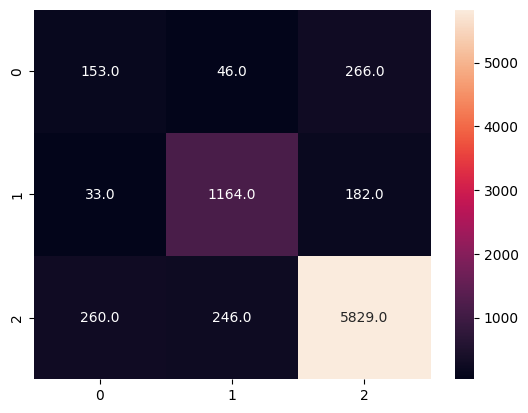

In [32]:
sns.heatmap(cm, annot= True,fmt='.1f')

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8737009414353833

In [41]:
samp="lets kill people n bury them"
data1=cv.transform([samp]).toarray()

In [40]:
data1

array([[0, 0, 0, ..., 0, 0, 0]])

In [39]:
dt.predict(data1)

array(['Offensive Speech'], dtype=object)